# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In our data project, we used publicly availably Pokemon Showdown Usage datasets before and after the inclusion of its newest Fairy Type. We analyzed whether its inclusion had an effect in the usage of not only Dragon Types, but also Supereffective Moves against Dragon and Fairy types. Using two-tailed t-tests with an alpha level of 0.01, there was a significant difference before and after Fairy Type's inclusion in both Dragon Type usage and Super Effective move usage. 

# Names

- Crystal Zhan
- Akil Selvan Rajendra Janarthanan 
- Kristen Prescaro
- Kristine Thipatima
- Ethan Dinh-Luong

<a id='research_question'></a>
# Research Question

How did the addition of the Fairy type Pokemon change competitive battling?

<a id='background'></a>

## Background & Prior Work

Pokémon Showdown is a Pokémon battle simulator that allows players to build teams of Pokémon and battle each other online in various battle formats. In a Pokémon battle, each player has a team of 6 Pokémon, and each Pokémon has 4 different moves that can be used in battles. Every Pokémon has 1 or 2 types, which determines their strengths and weaknesses against other Pokémon types, and each move also has 1 type. Each Pokémon is assigned a limited pool of usable moves that can include other types besides its own. 
Prior to the 6th generation of Pokémon, there were 17 Pokémon types. However, Gen VI saw the introduction of the Fairy type, which created a major shift in type dynamics. Fairy types are weak to Poison and Steel and super effective against Dark, Fighting, and, most notably, Dragon. Fairy is the only type that is both super effective against and completely immune to Dragon types, a type which has historically been popular in competitive Pokémon battles because of their high stats (the highest average stat total of all types, according to Bulbapedia) and few type weaknesses. Nicholas Vadivelu’s analysis on competitive Pokémon found that Fairy type Pokemon have become quite prominent in upper competitive tiers, which effectively puts them in direct competition with Dragon types.

Pokemon Showdown has two major formats: Ubers and OU. Each format has different restrictions on what Pokemon are allowed based on how dominating a Pokemon is. OU has more restrictions on Pokemon than Ubers, banning Pokemon that are too powerful to allow Pokemon that are less used to be more effective. Ubers has the least restrictions and allows players to use the Pokemon that they would like with a few minor exceptions. The introduction of Fairy types in generation 6 affect the use of Dragon types differently in each format as different Fairy types are allowed in each tier. 


References (include links):
- https://bulbapedia.bulbagarden.net/wiki/Dragon_(type)
- https://github.com/n2cholas/pokemon-analysis/blob/master/Competitive-Pokemon-Analysis-and-Modelling.ipynb

# Hypothesis


With the addition of the new Fairy type in Generation 6, we predicted that types effective against Fairy type (Poison, Steel) would increase in usage, while the Dragon type, which is weak to Fairy type, would decrease in usage. We would also expect Ice types, another counter to Dragon types, to decrease in usage. We predicted that the trend would remain consistent as more Fairy type Pokemon are added to the game with each generation.

# Dataset(s)

### Dataset Name: Pokedex
- Link to the dataset: https://github.com/smogon/pokemon-showdown/blob/master/data/pokedex.ts
- Number of observations: 1155
- This dataset has every single Pokemon and many of their attributes, like name, gender, height, and stats. We are using their name and type. 
### Dataset Name: Moves
- Link to the dataset: https://github.com/smogon/pokemon-showdown/blob/master/data/moves.ts
- Number of observations: 859 
- This dataset has every single move a Pokemon can learn and attributes, like power, accuracy, and type. We will be using the move's type and name. 

### Dataset Name: Pokemon Showdown Battle Stats 
- Link to the dataset: https://www.smogon.com/stats/
- Number of observations: 6001
- This dataset has all the statistics from Pokemon Showdown battles ranging from 2014 to now in different battle formats. We will extract the top Pokemon used in specific formats and months at high rating, alongside the Pokemon usage % and move usage %. 

### Joining the Datasets
- **Battle Stats** and **Pokedex** will be merged on the Pokemon's Name.
- **Battle Stats** and **Moves** will be merged on the Move Names.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

## Cleaning Informational Data (Pokemon Moves, Pokemon Types)

The list of moves is in a semi-structed JSON file, which we needed to clean up so we only had the relevant information about the moves. 

In [42]:
moves = pd.read_json("Pokedex and Moves/data/moves.json")
moves.head()

,10000000voltthunderbolt,absorb,accelerock,acid,acidarmor,aciddownpour,acidspray,acrobatics,acupressure,aerialace,...,workup,worryseed,wrap,wringout,xscissor,yawn,zapcannon,zenheadbutt,zingzap,zippyzap
num,719,71,709,51,151,628,491,512,367,332,...,526,388,35,378,404,281,192,428,716,729
accuracy,True,100,100,100,True,True,100,100,True,True,...,True,100,90,100,100,True,50,90,100,100
basePower,195,20,40,40,0,1,40,55,0,60,...,0,0,15,0,80,0,120,80,80,80
category,Special,Special,Physical,Special,Status,Physical,Special,Physical,Status,Physical,...,Status,Status,Physical,Special,Physical,Status,Special,Physical,Physical,Physical
isNonstandard,Past,NaN,NaN,NaN,NaN,Past,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Past,NaN,NaN,NaN,NaN,NaN,LGPE


As can be seen, the names of the moves are the column names and the variables are the row names. However, we want it the other way around, with the move names as the index. 

We also only want the move name and the move type, so we remove all other variables. 

Next, we reset the index so there are index numbers and rename the index column to be called move.

Now, our move dataset is clean. 

In [43]:
# switching the column and row names 
moves = moves.T

# removing all columns except move name & type
moves = moves.loc[:,["name", "type"]]

#resetting the index numbers
moves = moves.reset_index()

#renaming index to be called move 
moves.rename(columns = {"index":"move"}, inplace=True)
moves.head()

,move,name,type
0,10000000voltthunderbolt,"10,000,000 Volt Thunderbolt",Electric
1,absorb,Absorb,Grass
2,accelerock,Accelerock,Rock
3,acid,Acid,Poison
4,acidarmor,Acid Armor,Poison


Now, we apply the same cleaning steps with the list of Pokemon. 

However, there is an extra step of removing any Mega or Gmax form Pokemon, as our Pokemon Showdown dataset doesn't include them, nor would they affect the usage of Pokemon based on type. 

In [44]:
pokemon = pd.read_json("Pokedex and Moves/data/pokedex.json")

#takes column name and row name and flips them
pokemon = pokemon.T 
pokemon = pokemon.iloc[0:1155, :]

#deletes all columns except for name and types
pokemon = pokemon.loc[:,["name", "types"]]
pokemon = pokemon.reset_index()

#renames index to be pokemon
pokemon.rename(columns = {"index":"pokemon"}, inplace=True)

#drop rows that contain the partial string "gmax or mega" in the pokemon column
pokemon = pokemon[~pokemon.pokemon.str.contains("gmax")]
pokemon = pokemon[~pokemon.name.str.contains("-Mega")]

pokemon.head()


,pokemon,name,types
0,bulbasaur,Bulbasaur,"[Grass, Poison]"
1,ivysaur,Ivysaur,"[Grass, Poison]"
2,venusaur,Venusaur,"[Grass, Poison]"
5,charmander,Charmander,[Fire]
6,charmeleon,Charmeleon,[Fire]


The next step for the Pokemon list is to split the type column into two parts, as some Pokemon have two types, while others have one. For those with one type, we will put null for the 2nd type. 

In [45]:
type1 = []
type2 = []

#loop through the list of pokemon and puts their types in their own columns
#puts None if there's no secondary type
for x in pokemon["types"]:
    type1.append(x[0])
    if (len(x) == 2):
        type2.append(x[1])
    else:
        type2.append(None)

pokemon["types"] = type1
pokemon["type2"] = type2
pokemon.head()


,pokemon,name,types,type2
0,bulbasaur,Bulbasaur,Grass,Poison
1,ivysaur,Ivysaur,Grass,Poison
2,venusaur,Venusaur,Grass,Poison
5,charmander,Charmander,Fire,None
6,charmeleon,Charmeleon,Fire,None


## Pokemon Showdown Battle Stats

The data given by Pokemon Showdown is several semi-structured JSON format files, where cleaning was needed in every file to read the data into a usable format. 

*The cleaning process exampled below was repeated for all other JSON files.*

Unnecessary data prior to our analysis was removed where data was null.

In [46]:
raw = pd.read_json("Pokemon Usage/September/raw/gen8/gen8ou-0.json")
df = raw[raw['data'].notna()]['data']
df

Mr. Mime-Galar    {'Moves': {'': 32.0, 'healingwish': 226.0, 'bl...
Eevee             {'Moves': {'': 197.0, 'rest': 7.0, 'mudslap': ...
Torracat          {'Moves': {'': 1.0, 'firespin': 20.0, 'leechli...
Poliwrath         {'Moves': {'': 58.0, 'counter': 48.0, 'liquida...
Emolga            {'Moves': {'': 2.0, 'eerieimpulse': 47.0, 'ris...
                                        ...                        
Shedinja          {'Moves': {'': 578.0, 'absorb': 11.0, 'falsesw...
Wishiwashi        {'Moves': {'': 67.0, 'liquidation': 393.0, 'be...
Sneasel           {'Moves': {'counter': 3.0, 'beatup': 9.0, 'bli...
Hitmontop         {'Moves': {'': 208.0, 'detect': 89.0, 'quickgu...
Kingdra           {'Moves': {'': 57.0, 'icywind': 32.0, 'liquida...
Name: data, Length: 440, dtype: object

To narrow down the data desired for our analysis, the following criteria were used to filter out the data:
- Pokemon with at least 2% usage
- Each Pokemon's Top 6 Moves

Additionally, each dataframe includes 4 more columns identifying which JSON file the data originated from, denoted by **Gen**, **Format**, **Rating**, and **Recent** given in the first few rows of the JSON file.

In [47]:
### Dictionary to make the DataFrame
top_mons = {}

### Saves the Pokemon as Indexes
ix = list(df.index)

### For each Observation
for row in range(len(df)):

    ### At least 2% Usage
    if df[row]['usage'] >= .02:

        ### Pokemon Name
        mon = ix[row]

        ### Finds the Top 6 Moves
        top_6 = list(dict(sorted(df[row]['Moves'].items(), key=lambda item: item[1], reverse=True)))[:6]
        
        ### Saves info to dictionary
        top_mons[mon] = [top_6, df[row]['usage']]

### Output DataFrame
cleaned = pd.DataFrame.from_dict(top_mons, orient = 'index').rename(columns = {0:"Moves", 1:"Usage"})

### Format, Gen, Rating Variables
metagame = raw.loc['metagame'][0]
gen = metagame[3]
format_name = metagame[4:]
rating = raw.loc["cutoff"][0]

### Adding the Variables to the DF
cleaned["Gen"] = gen
cleaned["Format"] = format_name
cleaned["Min Rating"] = rating
cleaned.head()


,Moves,Usage,Gen,Format,Min Rating
Landorus-Therian,"[earthquake, uturn, stealthrock, knockoff, tox...",0.304108,8,ou,0.0
Blissey,"[softboiled, seismictoss, toxic, teleport, thu...",0.084829,8,ou,0.0
Slowbro,"[scald, teleport, slackoff, futuresight, icebe...",0.057747,8,ou,0.0
Crawdaunt,"[aquajet, knockoff, crabhammer, swordsdance, c...",0.028303,8,ou,0.0
Urshifu-Rapid-Strike,"[surgingstrikes, closecombat, aquajet, uturn, ...",0.129478,8,ou,0.0


## Joining the Datasets

### Showdown Usage with Moves

Firstly, we imported all the cleaned data from the prior section that was applied to all JSON files.

In [48]:
### Importing Usage DFs and Merging Them
recentdf = pd.read_csv("Pokemon Usage/SeptemberData.csv",index_col=0).rename(columns = {'index':"name"})
olddf =  pd.read_csv("Pokemon Usage/OldData.csv",index_col=0).rename(columns = {'index':"name"})
usagedf = recentdf.merge(olddf, how='outer')
print(usagedf.shape)
usagedf.head()

(5916, 7)


,name,Moves,Usage,Gen,Format,Min Rating,Recent
0,Bronzong,"['gyroball', 'explosion', 'earthquake', 'steal...",0.124514,4.0,ou,0.0,1
1,Swampert,"['earthquake', 'stealthrock', 'waterfall', 'ic...",0.120051,4.0,ou,0.0,1
2,Snorlax,"['bodyslam', 'crunch', 'earthquake', 'curse', ...",0.040116,4.0,ou,0.0,1
3,Uxie,"['stealthrock', 'uturn', 'thunderwave', 'psych...",0.023561,4.0,ou,0.0,1
4,Machamp,"['dynamicpunch', 'payback', 'bulletpunch', 'ic...",0.102777,4.0,ou,0.0,1


The **Moves** column deceptively looks cleaned in a list format, but upon closer observation, it is actually a *string* representation of a list.

In [49]:
type(usagedf["Moves"][0])

str

Addressing this, we will convert the string into a list by stripping the list representation and splitting the string by commas. Afterwards, we can proceed with standardizing the moves by its type.

In [50]:
### Importing Moves DF
movesdf = pd.read_csv("Pokedex and Moves/moves.csv", index_col=0).set_index('move')

### Standardize the Moves
def standardize_moves(df):

    ### List Representations of each Column
    type1 = []
    type2 = []
    type3 = []
    type4 = []
    type5 = []
    type6 = []

    ### List of Pointers to Column Lists
    type_list = [type1, type2, type3, type4, type5, type6]

    ### For Each Row
    for row in range(len(df["Moves"])):

        ### Strip the List Borders and Create a List by Splitting on Commas in the String
        moves = df["Moves"][row].strip('][').split(', ')

        ### Tracks which Column Each Move Belongs to
        list_num = 0

        ### For Each Column
        for each in range(6):

            ### If a Pokemon has less than 6 moves, return nan
            if each >= len(moves):
                move_type = np.nan
                type_list[list_num].append(move_type)
                list_num += 1

            else:
                ### Removes Outer Apostrophes, if any
                string = moves[each].strip("'")

                ### If a Popular Move is an Empty Slot, return nan
                if (string) == "":
                    move_type = np.nan
                    type_list[list_num].append(move_type)
                    list_num += 1
                else:

                    ### Find Move in Move DF containing Type
                    move_type = movesdf.loc[string]['type']

                    ### Add to Column
                    type_list[list_num].append(move_type)

                    ### Change Column
                    list_num += 1

    ### Piecing Everything Together
    df["Type 1"] = type_list[0]
    df["Type 2"] = type_list[1]
    df["Type 3"] = type_list[2]
    df["Type 4"] = type_list[3]
    df["Type 5"] = type_list[4]
    df["Type 6"] = type_list[5]

    return df

usagemovesdf = standardize_moves(usagedf)
usagemovesdf.head()

,name,Moves,Usage,Gen,Format,Min Rating,Recent,Type 1,Type 2,Type 3,Type 4,Type 5,Type 6
0,Bronzong,"['gyroball', 'explosion', 'earthquake', 'steal...",0.124514,4.0,ou,0.0,1,Steel,Normal,Ground,Rock,Psychic,Water
1,Swampert,"['earthquake', 'stealthrock', 'waterfall', 'ic...",0.120051,4.0,ou,0.0,1,Ground,Rock,Water,Ice,Ice,Normal
2,Snorlax,"['bodyslam', 'crunch', 'earthquake', 'curse', ...",0.040116,4.0,ou,0.0,1,Normal,Dark,Ground,Ghost,Psychic,Fire
3,Uxie,"['stealthrock', 'uturn', 'thunderwave', 'psych...",0.023561,4.0,ou,0.0,1,Rock,Bug,Electric,Psychic,Psychic,Psychic
4,Machamp,"['dynamicpunch', 'payback', 'bulletpunch', 'ic...",0.102777,4.0,ou,0.0,1,Fighting,Dark,Steel,Ice,Rock,Normal


### Showdown Usage with Pokemon Types

As opposed to the complexity of joining moves with usage, simply joining the Pokemon Types DF stats on the Showdown Usage on **name** will add two new columns **Type 1** and **Type 2** to the Showdown Usage DF.

In [51]:
### Import Usage Data
usagedf = recentdf.merge(olddf, how='outer')

### Import Pokemon Types Data
pokedexdf = pd.read_csv("Pokedex and Moves/pokemon.csv", index_col=0).set_index('name')[['types','type2']]

### Left Join Usage DF with Pokemon Types DF on "name" while renaming the additional columns
usagetypesdf = usagedf.join(pokedexdf, on="name").rename(columns={'types': "Type 1", "type2": "Type 2"})
usagetypesdf

,name,Moves,Usage,Gen,Format,Min Rating,Recent,Type 1,Type 2
0,Bronzong,"['gyroball', 'explosion', 'earthquake', 'steal...",0.124514,4.0,ou,0.0,1,Steel,Psychic
1,Swampert,"['earthquake', 'stealthrock', 'waterfall', 'ic...",0.120051,4.0,ou,0.0,1,Water,Ground
2,Snorlax,"['bodyslam', 'crunch', 'earthquake', 'curse', ...",0.040116,4.0,ou,0.0,1,Normal,NaN
3,Uxie,"['stealthrock', 'uturn', 'thunderwave', 'psych...",0.023561,4.0,ou,0.0,1,Psychic,NaN
4,Machamp,"['dynamicpunch', 'payback', 'bulletpunch', 'ic...",0.102777,4.0,ou,0.0,1,Fighting,NaN
...,...,...,...,...,...,...,...,...,...
5911,Charizard,"['solarbeam', 'fireblast', 'hurricane', 'airsl...",0.030482,8.0,ubers,0.0,0,Fire,Flying
5912,Shuckle,"['stickyweb', 'stealthrock', 'encore', 'finalg...",0.045773,8.0,ubers,0.0,0,Bug,Rock
5913,Hatterene,"['mysticalfire', 'psychic', 'dazzlinggleam', '...",0.026064,8.0,ubers,0.0,0,Psychic,Fairy
5914,Zacian-Crowned,"['behemothblade', 'playrough', 'swordsdance', ...",0.921806,8.0,ubers,0.0,0,Fairy,Steel


# Exploratory Data Analysis

Before modeling our data, we want to extract the necessary labeled variables that we are analyzing into a quantitative variable, specifically the move types. We "standardize" these categoricals by counting how many moves within a Pokemon's Top 6 Moves are supereffective against either Fairy or Dragon Types and assign them to two new columns: **SE Dragon** and **SE Fairy**.

In [52]:
### Finds all Super Effective Moves in the column
def SE_moves(move_type, df, col, binary=False):

    ### Checks if Moves are supereffecctive against Dragon
    if move_type == "Dragon":
        SE_moves = ["Ice","Dragon"]
    
    ### Checks if Moves are supereffective against Fairy
    else:
        SE_moves = ["Steel","Poison"]

    ### Creates New Variable
    is_SE = None

    ### For each Super Effective Move
    for each in SE_moves:

        ### First Iteration
        if is_SE is None:
            
            ### Finds Supereffective Moves and marks them as 1
            is_SE = (df[col] == each)*1
        else:
            ### Keeps count of Supereffective Moves
            is_SE += (df[col] == each)*1
    
    ### Returns Column with Count of Supereffective Moves per Pokemon
    return is_SE

### Function that checks through all columns and types
def find_all_SE(df, binary = False):
    types = ["Dragon", "Fairy"]
    col = ["Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6"]
    SE_col = ["SE Dragon", "SE Fairy"]

    for each in types:

        all_SE = None

        for col_name in col:

            if all_SE is None:
                all_SE = SE_moves(each, df, col_name)
            else:
                all_SE += SE_moves(each, df, col_name)

        ### Changes to binary results, if specified
        if binary:
            all_SE = (all_SE > 0) * 1
        df[SE_col[0]] = all_SE
        SE_col = SE_col[1:]
    
    return df

usagemovesdf = find_all_SE(usagemovesdf)
usagemovesdf.head()

,name,Moves,Usage,Gen,Format,Min Rating,Recent,Type 1,Type 2,Type 3,Type 4,Type 5,Type 6,SE Dragon,SE Fairy
0,Bronzong,"['gyroball', 'explosion', 'earthquake', 'steal...",0.124514,4.0,ou,0.0,1,Steel,Normal,Ground,Rock,Psychic,Water,0,1
1,Swampert,"['earthquake', 'stealthrock', 'waterfall', 'ic...",0.120051,4.0,ou,0.0,1,Ground,Rock,Water,Ice,Ice,Normal,2,0
2,Snorlax,"['bodyslam', 'crunch', 'earthquake', 'curse', ...",0.040116,4.0,ou,0.0,1,Normal,Dark,Ground,Ghost,Psychic,Fire,0,0
3,Uxie,"['stealthrock', 'uturn', 'thunderwave', 'psych...",0.023561,4.0,ou,0.0,1,Rock,Bug,Electric,Psychic,Psychic,Psychic,0,0
4,Machamp,"['dynamicpunch', 'payback', 'bulletpunch', 'ic...",0.102777,4.0,ou,0.0,1,Fighting,Dark,Steel,Ice,Rock,Normal,1,1


In [53]:
#takes the combined df of types of pokemon + their usages and splits them into usage of Dragon type and non Dragon type Pokemon

def find_type(generation, format, type):
    #makes new df that only has Pokemon of wanted generation + format
    df = usagetypesdf[(usagetypesdf["Gen"] == generation) & (usagetypesdf["Format"] == format)]

    #new df that only has wanted type
    types = df.loc[((df['Type 1']==type) | (df['Type 2']==type)), :]
    
    #finds usage of the type
    typesusage = types['Usage'].sum()

    #new df that has any pokemon that's not the wanted type
    nottype = df.loc[((df['Type 1']!=type) & (df['Type 2']!=type)), :]

    #finds usage of not type
    nottypeusage = nottype['Usage'].sum()
    
    #new array with usages to be returned
    usagedf = [typesusage, nottypeusage]

    return usagedf

First, let us see how the usage of dragon type pokemon was affected by the addition of fairy type pokemon. We can also at how often fairy type pokemon were used in each format to see how popular they were.

In [54]:
#finds the usage of dragon/fairy type in ubers format in each generation

dgen4ubers = find_type (4, "ubers", "Dragon")
dgen5ubers = find_type (5, "ubers", "Dragon")
dgen6ubers = find_type (6, "ubers", "Dragon")
dgen7ubers = find_type (7, "ubers", "Dragon")
dgen8ubers = find_type (8, "ubers", "Dragon")

fgen6ubers = find_type (6, "ubers", "Fairy")
fgen7ubers = find_type (7, "ubers", "Fairy")
fgen8ubers = find_type (8, "ubers", "Fairy")

In [55]:
#finds the usage of dragon/fairy type in ou format in each generation

dgen4ou = find_type (4, "ou", "Dragon")
dgen5ou = find_type (5, "ou", "Dragon")
dgen6ou = find_type (6, "ou", "Dragon")
dgen7ou = find_type (7, "ou", "Dragon")
dgen8ou = find_type (8, "ou", "Dragon")

fgen6ou = find_type (6, "ou", "Fairy")
fgen7ou = find_type (7, "ou", "Fairy")
fgen8ou = find_type (8, "ou", "Fairy")

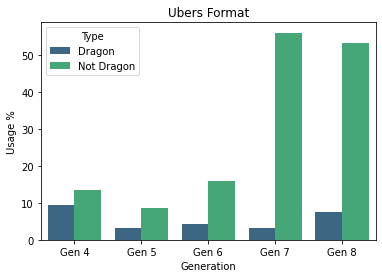

In [56]:
#Using the values above, we made a dataframe with the usage % of dragon types and non-dragon types across generations in Ubers format.
ubdragondf2= pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4', 'Gen 5', 'Gen 5', 'Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Dragon', 'Not Dragon', 'Dragon', 'Not Dragon','Dragon', 'Not Dragon','Dragon', 'Not Dragon', 'Dragon', 'Not Dragon'],
        "Usage %": [dgen4ubers[0], dgen4ubers[1], dgen5ubers[0], dgen5ubers[1], dgen6ubers[0], dgen6ubers[1], dgen7ubers[0], dgen7ubers[1], dgen8ubers[0], dgen8ubers[1]],
    },
)
# We then used this dataframe to create a barplot comparing dragon and not dragon usage in Ubers format.
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=ubdragondf2,
            palette='viridis'
           ).set_title("Ubers Format");


In Ubers format, the % of dragon type usage shows a gradual decline until the increase of usage in generation 8. Meanwhile, the usage % of non-dragon types declines a bit in generation 5 but spikes up in generations 7 and 8.

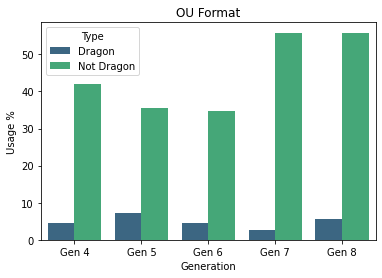

In [57]:
#Similarly, we created a dataframe containing the usage % of dragon types and not dragon types across generations in OU format. 
oudragondf2= pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4', 'Gen 5', 'Gen 5', 'Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Dragon', 'Not Dragon', 'Dragon', 'Not Dragon','Dragon', 'Not Dragon','Dragon', 'Not Dragon', 'Dragon', 'Not Dragon'],
        "Usage %": [dgen4ou[0], dgen4ou[1], dgen5ou[0], dgen5ou[1], dgen6ou[0], dgen6ou[1], dgen7ou[0], dgen7ou[1], dgen8ou[0], dgen8ou[1]],
    },
)
#We used this dataframe to create a barplot comparing dragon and not dragon usage in OU format.
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=oudragondf2,
            palette='viridis'
           ).set_title("OU Format");


In the OU format, the % of not Dragon types decreases until generation 7, where it goes to its highest and stays at that level in generation 8. On the other hand, the % of Dragon types fluctuates, decreasing from 6 -> 7, then back up again in generation 8.

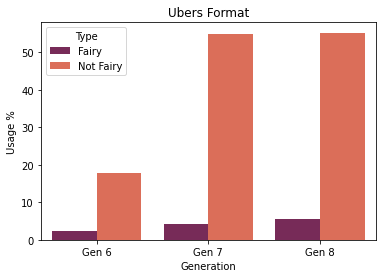

In [58]:
#We created a dataframe containing the usage % of fairy types and not fairy types across generations in Ubers format.
ubFairydf2= pd.DataFrame(
    {
        "Generation" : ['Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Fairy', 'Not Fairy', 'Fairy', 'Not Fairy','Fairy', 'Not Fairy'],
        "Usage %": [fgen6ubers[0], fgen6ubers[1], fgen7ubers[0], fgen7ubers[1], fgen8ubers[0], fgen8ubers[1]],
    },
)
#We used the dataframe above to create a barplot that compares fairy and not fairy usage in Ubers format
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=ubFairydf2,
            palette='rocket'
           ).set_title("Ubers Format");

In the Ubers format, the % of not Fairy types goes up from generation 6 to 7, then stays the same between 7 and 8. The % of Fairy types goes up very slightly, although that could be noise.

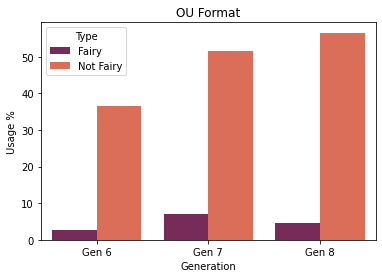

In [59]:
#We also created a dataframe containing the usage % of fairy types and not fairy types across generations in OU format.
ouFairydf2= pd.DataFrame(
    {
        "Generation" : ['Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Fairy', 'Not Fairy', 'Fairy', 'Not Fairy','Fairy', 'Not Fairy'],
        "Usage %": [fgen6ou[0], fgen6ou[1], fgen7ou[0], fgen7ou[1], fgen8ou[0], fgen8ou[1]],
    },
)
#This dataframe was used to create a barplot comparing fairy and not fairy usage in OU format.
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=ouFairydf2,
            palette='rocket'
           ).set_title("OU Format");

In each generation in the OU format, the % of not Fairy types goes up, while Fairy type increases in generation 7 and declines a bit in generation 8.

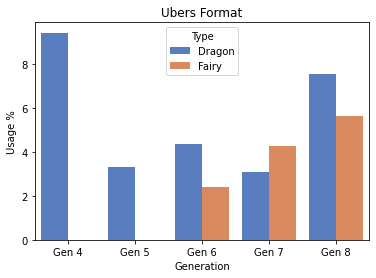

In [60]:
#Here we have made a new dataframe that contains the usage % of dragon types and fairy types across generations in Ubers format.
ubdragonfairydf= pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4', 'Gen 5', 'Gen 5', 'Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Dragon', 'Fairy', 'Dragon', 'Fairy','Dragon', 'Fairy','Dragon', 'Fairy', 'Dragon', 'Fairy'],
        "Usage %": [dgen4ubers[0], 0, dgen5ubers[0], 0, dgen6ubers[0], fgen6ubers[0], dgen7ubers[0], fgen7ubers[0], dgen8ubers[0], fgen8ubers[0]],
    },
)
#Using this dataframe, we created a barplot comparing dragon and fairy usage in Ubers format.
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=ubdragonfairydf,
            palette='muted'
           ).set_title("Ubers Format");

The number of Dragon type Pokemon fluctuates between each generation, although for each generation that Fairy type is in, usage seems to go up. In generation 6 and 8, there are more Dragon than fairy types, although the reverse is true for generation 7.

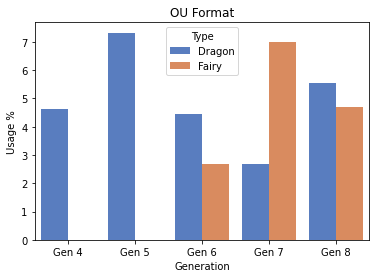

In [61]:
#We also created a new dataframe that contains the usage % of dragon types and fairy types across generations in ou format.
oudragonfairydf= pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4', 'Gen 5', 'Gen 5', 'Gen 6', 'Gen 6','Gen 7', 'Gen 7','Gen 8', 'Gen 8'],
        "Type": ['Dragon', 'Fairy', 'Dragon', 'Fairy','Dragon', 'Fairy','Dragon', 'Fairy', 'Dragon', 'Fairy'],
        "Usage %": [dgen4ou[0], 0, dgen5ou[0], 0, dgen6ou[0], fgen6ou[0], dgen7ou[0], fgen7ou[0], dgen8ou[0], fgen8ou[0]],
    },
)
# We used this dataframe to create a barplot that compares dragon and fairy usage in OU format.
sns.barplot(x="Generation", 
            y="Usage %", 
            hue="Type", 
            data=oudragonfairydf,
            palette='muted'
           ).set_title("OU Format");

In OU format, both Dragon and Fairy type usage seem to fluctuate. The usage % of dragon types decreases in Generation 6, when Fairy types are introduced, and it continues to decline in Generation 7 as Fairy type usage increases significantly. Generation 8 sees an increase in Dragon type usage while Fairy type usage decreases.

Now, le'ts look at how the movepools of pokemon changed to reflect the addition of Fairy type Pokemon in generation 6.

In [62]:
usagemovesdf.head()

,name,Moves,Usage,Gen,Format,Min Rating,Recent,Type 1,Type 2,Type 3,Type 4,Type 5,Type 6,SE Dragon,SE Fairy
0,Bronzong,"['gyroball', 'explosion', 'earthquake', 'steal...",0.124514,4.0,ou,0.0,1,Steel,Normal,Ground,Rock,Psychic,Water,0,1
1,Swampert,"['earthquake', 'stealthrock', 'waterfall', 'ic...",0.120051,4.0,ou,0.0,1,Ground,Rock,Water,Ice,Ice,Normal,2,0
2,Snorlax,"['bodyslam', 'crunch', 'earthquake', 'curse', ...",0.040116,4.0,ou,0.0,1,Normal,Dark,Ground,Ghost,Psychic,Fire,0,0
3,Uxie,"['stealthrock', 'uturn', 'thunderwave', 'psych...",0.023561,4.0,ou,0.0,1,Rock,Bug,Electric,Psychic,Psychic,Psychic,0,0
4,Machamp,"['dynamicpunch', 'payback', 'bulletpunch', 'ic...",0.102777,4.0,ou,0.0,1,Fighting,Dark,Steel,Ice,Rock,Normal,1,1


In [63]:
# We are only looking at ou and ubers formats
usagemovesdf2 = usagemovesdf[(usagemovesdf['Format'] == 'ou') | (usagemovesdf['Format'] == 'ubers')] 

# We are looking at the % of moves SE against Dragons in both tiers
# The reason we are calculating usage % this way is: usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Dragon'].sum() tells us how many SE moves were used in the 4th gen and (usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Dragon'].count() *6) tells us how many total moves were used in the 4th gen. We can simply multiply by 6 here because we are only looking at the top 6 moves! We use the same logic for calculating the rest of the SE percentages.
gen4SEDragons = usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Dragon'].count() *6)
gen5SEDragons = usagemovesdf2[(usagemovesdf2['Gen'] == 5)]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5)]['SE Dragon'].count() *6)
gen6SEDragons = usagemovesdf2[(usagemovesdf2['Gen'] == 6)]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6)]['SE Dragon'].count() *6)
gen7SEDragons = usagemovesdf2[(usagemovesdf2['Gen'] == 7)]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7)]['SE Dragon'].count() *6)
gen8SEDragons = usagemovesdf2[(usagemovesdf2['Gen'] == 8)]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8)]['SE Dragon'].count() *6)

# We are looking at the % of moves SE against Dragons in just Ubers
gen4SEDragonsUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].count() *6)

gen5SEDragonsUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].count() *6)

gen6SEDragonsUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].count() *6)

gen7SEDragonsUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].count() *6)

gen8SEDragonsUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ubers')]['SE Dragon'].count() *6)

# We are looking at the % of moves SE against Dragons in just OU
gen4SEDragonsOU = usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].count() *6)

gen5SEDragonsOU = usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].count() *6)

gen6SEDragonsOU = usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].count() *6)

gen7SEDragonsOU = usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].count() *6)

gen8SEDragonsOU = usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ou')]['SE Dragon'].count() *6)




print(gen4SEDragons, gen5SEDragons, gen6SEDragons, gen7SEDragons, gen8SEDragons)

gen4SEDragonsUbers

0.11412429378531073 0.12471264367816091 0.09877354358300482 0.09765715611227094 0.08610435252771019


0.15517241379310345

Text(0.5, 1.0, 'Moves SE against dragon in Generations 4-8')

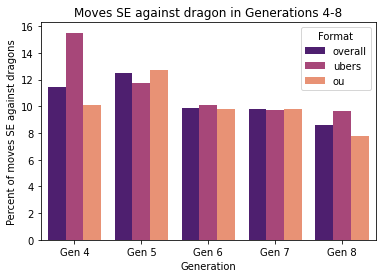

In [64]:
# We make a new dataframe with the % of moves SE against a Dragon from the numbers we calculated above.
seDragonsDf = pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4','Gen 4', 'Gen 5', 'Gen 5','Gen 5', 'Gen 6', 'Gen 6','Gen 6','Gen 7', 'Gen 7','Gen 7','Gen 8', 'Gen 8', 'Gen 8'],
        "Format": ['overall', 'ubers', 'ou', 'overall', 'ubers', 'ou', 'overall', 'ubers', 'ou', 'overall', 'ubers', 'ou','overall', 'ubers', 'ou'],
        "Percent of moves SE against dragons": [gen4SEDragons, gen4SEDragonsUbers, gen4SEDragonsOU, gen5SEDragons, gen5SEDragonsUbers, gen5SEDragonsOU, gen6SEDragons, gen6SEDragonsUbers, gen6SEDragonsOU, gen7SEDragons, gen7SEDragonsUbers, gen7SEDragonsOU, gen8SEDragons, gen8SEDragonsUbers, gen8SEDragonsOU],
    },
)

# change decimal into a percentage
seDragonsDf["Percent of moves SE against dragons"] = seDragonsDf["Percent of moves SE against dragons"].apply(lambda x: x*100)

sns.barplot(x="Generation", 
            y="Percent of moves SE against dragons", 
            hue="Format", 
            data=seDragonsDf,
            palette='magma'
           ).set_title("Moves SE against dragon in Generations 4-8")



As we would expect, the number of Ice type and Dragon type moves, the types that Dragon is weak to, went down a noticable amount with the introduction of Fairy types in generation 6. This is because Fairy type attacks were a new viable counter to Dragon types so players had more options to choose from and chose Ice and Dragon types much less. 

In [65]:
# Here, we repeat the same process for moves that are SE against the Fairy type.
# We are looking at the % of moves SE against Fairy in both tiers
gen4SEFairy = usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4)]['SE Fairy'].count() *6)
gen5SEFairy = usagemovesdf2[(usagemovesdf2['Gen'] == 5)]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5)]['SE Fairy'].count() *6)
gen6SEFairy = usagemovesdf2[(usagemovesdf2['Gen'] == 6)]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6)]['SE Fairy'].count() *6)
gen7SEFairy = usagemovesdf2[(usagemovesdf2['Gen'] == 7)]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7)]['SE Fairy'].count() *6)
gen8SEFairy = usagemovesdf2[(usagemovesdf2['Gen'] == 8)]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8)]['SE Fairy'].count() *6)

# We are looking at the % of moves SE against Fairy in just Ubers
gen4SEFairyUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].count() *6)

gen5SEFairyUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].count() *6)

gen6SEFairyUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].count() *6)

gen7SEFairyUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].count() *6)

gen8SEFairyUbers = usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ubers')]['SE Fairy'].count() *6)

# We are looking at the % of moves SE against Fairy in just OU
gen4SEFairyOU = usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 4) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].count() *6)

gen5SEFairyOU = usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 5) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].count() *6)

gen6SEFairyOU = usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 6) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].count() *6)

gen7SEFairyOU = usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 7) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].count() *6)

gen8SEFairyOU = usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].sum()/ (usagemovesdf2[(usagemovesdf2['Gen'] == 8) & (usagemovesdf2['Format'] == 'ou')]['SE Fairy'].count() *6)

Text(0.5, 1.0, 'Moves SE against fairy in Generations 4-8')

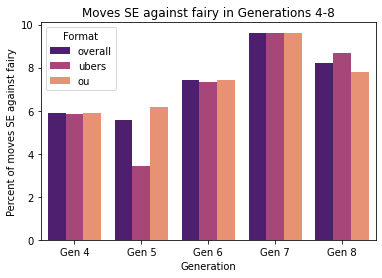

In [66]:
# We make a dataframe based on the result from the calculations above
seFairyDf = pd.DataFrame(
    {
        "Generation" : ['Gen 4', 'Gen 4','Gen 4', 'Gen 5', 'Gen 5','Gen 5', 'Gen 6', 'Gen 6','Gen 6','Gen 7', 'Gen 7','Gen 7','Gen 8', 'Gen 8', 'Gen 8'],
        "Format": ['overall', 'ubers', 'ou', 'overall', 'ubers', 'ou', 'overall', 'ubers', 'ou', 'overall', 'ubers', 'ou','overall', 'ubers', 'ou'],
        "Percent of moves SE against fairy": [gen4SEFairy, gen4SEFairyUbers, gen4SEFairyOU, gen5SEFairy, gen5SEFairyUbers, gen5SEFairyOU, gen6SEFairy, gen6SEFairyUbers, gen6SEFairyOU, gen7SEFairy, gen7SEFairyUbers, gen7SEFairyOU, gen8SEFairy, gen8SEFairyUbers, gen8SEFairyOU],
    },
)

# change decimal into a percentage
seFairyDf["Percent of moves SE against fairy"] = seFairyDf["Percent of moves SE against fairy"].apply(lambda x: x*100)

sns.barplot(x="Generation", 
            y="Percent of moves SE against fairy", 
            hue="Format", 
            data=seFairyDf,
            palette='magma'
           ).set_title("Moves SE against fairy in Generations 4-8")


As we would expect, the number of moves super effective against fairy types increased drastically in Gen 6 with the introduction of fairy types. Players were forced to use steel, and poison type attacks more frequently in order to counter the new fairy pokemon.

# Data Analysis & Results

### Dragon Type Usage

To compare the usage of Dragon Types before and after the inclusion of Fairy Types, we split the dataset into two group: *beforeFairy* (Before Gen 6) and *afterFairy* (After Gen 6). Afterwards, we find the approximate mean usage of Dragon Types in both datasets.

In [67]:
### Finds all Dragon Types
dragonType = usagetypesdf[(usagetypesdf["Type 1"] == "Dragon")|(usagetypesdf["Type 2"] == "Dragon")]

### Splits Dataset before and after Fairy Types
beforeFairy = dragonType[dragonType["Gen"] < 6]
afterFairy = dragonType[dragonType["Gen"] >= 6]

### Finds Mean Usage Rate
beforemean = beforeFairy["Usage"].mean()
aftermean = afterFairy["Usage"].mean()
print("Before Gen 6:", beforemean)
print("After Gen 6:",aftermean)

Before Gen 6: 0.15683167250000002
After Gen 6: 0.08332472104018905


To determine if we accept or reject the null hypothesis that there was no difference in usage before and after the inclusion of Fairy types, we run a two tailed T-test to determine if there is a significant usage difference in the population with an alpha level of 0.01. 

In [68]:
### Checks Overall Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy["Usage"], afterFairy["Usage"])

Ttest_indResult(statistic=7.380624084105374, pvalue=5.480816257755981e-13)

In the overall population, the p-value from the t-test is less than our alpha level, so there is a significant usage difference in the population and we reject the null hypothesis.

To determine if *Format* has an effect on the usage, we separated the datasets further into two common formats: *OU* and *Ubers* as those formats are available across all generations.

In [69]:
beforeFairy_OU = beforeFairy[beforeFairy["Format"] == "ou"]
afterFairy_OU = afterFairy[afterFairy["Format"] == "ou"]

### Checks OU Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_OU["Usage"], afterFairy_OU["Usage"])

Ttest_indResult(statistic=5.500304527070942, pvalue=9.392912713762024e-08)

In the OU population, the p-value from the t-test is less than our alpha level, so there is a significant usage difference in the population and we reject the null hypothesis.

In [70]:
beforeFairy_ubers = beforeFairy[beforeFairy["Format"] == "ubers"]
afterFairy_ubers = afterFairy[afterFairy["Format"] == "ubers"]

### Checks Uber Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_ubers["Usage"], afterFairy_ubers["Usage"])

Ttest_indResult(statistic=4.967363303140621, pvalue=1.3166872709466642e-06)

In the Ubers population, the p-value from the t-test is less than our alpha level, so there is a significant usage difference in the population and we reject the null hypothesis.

### Move Usage

Similarly to the above section, we want compare the usage of supereffective moves before and after the inclusion of Fairy types by splitting the dataset into two group: *beforeFairy* (Before Gen 6) and *afterFairy* (After Gen 6). Afterwards, we find the approximate mean usage of moves in both datasets.

In [71]:
### Splits the Dataset Before and After Fairy Types
beforeFairy = usagemovesdf[usagemovesdf["Gen"] < 6]
afterFairy = usagemovesdf[usagemovesdf["Gen"] >= 6]

### Checks the mean number of SuperEffective Moves
beforemean = beforeFairy["SE Dragon"].mean()
aftermean = afterFairy["SE Dragon"].mean()
print("Before Gen 6:", beforemean)
print("After Gen 6:",aftermean)

Before Gen 6: 0.6717171717171717
After Gen 6: 0.528476821192053


First, we analyze supereffective moves against Dragon types. To determine if we accept or reject the null hypothesis that there was no difference in move usage before and after the inclusion of Fairy Types, we run a two tailed T-test to determine if there is a significant difference with an alpha level of 0.01. 

In [72]:
### Checks Overall SE Dragon Moves Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy["SE Dragon"], afterFairy["SE Dragon"])


Ttest_indResult(statistic=5.477339385599182, pvalue=4.4957687612994866e-08)

Once again, the p-value is less than our alpha value, indicating there is a significant difference of supereffective move usage before and after the inclusion of Fairy types, rejecting the null hypothesis.

Just as we did with Dragon Type usage, we split the data accordingly once again to check if *Format* had an effect on the usage.

In [73]:
beforeFairy_OU = beforeFairy[beforeFairy["Format"] == "ou"]
afterFairy_OU = afterFairy[afterFairy["Format"] == "ou"]

### Checks OU Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_OU["SE Dragon"], afterFairy_OU["SE Dragon"])

Ttest_indResult(statistic=3.931113698897302, pvalue=8.65230340129105e-05)

In the OU population, the p-value from the t-test is less than our alpha level, so there is a significant difference of supereffective moves against Dragon Types and we reject the null hypothesis.

In [74]:
beforeFairy_ubers = beforeFairy[beforeFairy["Format"] == "ubers"]
afterFairy_ubers = afterFairy[afterFairy["Format"] == "ubers"]

### Checks Uber Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_ubers["SE Dragon"], afterFairy_ubers["SE Dragon"])

Ttest_indResult(statistic=4.043690621074755, pvalue=5.498965613328138e-05)

In the Ubers population, the p-value from the t-test is less than our alpha level, so there is a significant difference of supereffective moves against Dragon Types and we reject the null hypothesis.

We repeat the same process with moves supereffective against Fairy types using the same alpha level. Our null hypothesis states that there is no difference in the distribution of moves prior to and after the inclusion of Fairy types.

In [75]:
### Splits the Dataset Before and After Fairy Types
beforeFairy = usagemovesdf[usagemovesdf["Gen"] < 6]
afterFairy = usagemovesdf[usagemovesdf["Gen"] >= 6]

### Checks the mean number of SuperEffective Moves
beforemean = beforeFairy["SE Fairy"].mean()
aftermean = afterFairy["SE Fairy"].mean()
print("Before Gen 6:", beforemean)
print("After Gen 6:",aftermean)

Before Gen 6: 0.33116883116883117
After Gen 6: 0.5408388520971302


In [76]:
### Checks Overall SE Fairy Moves Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy["SE Fairy"], afterFairy["SE Fairy"])

Ttest_indResult(statistic=-9.371191325236575, pvalue=9.977344019613692e-21)

Once again, the p-value is less than our alpha value, indicating there is a significant difference between supereffective moves against Fairy types and rejecting the null hypothesis.

We repeat the same process in dividing the datasets by *Format*.

In [77]:
beforeFairy_OU = beforeFairy[beforeFairy["Format"] == "ou"]
afterFairy_OU = afterFairy[afterFairy["Format"] == "ou"]

### Checks OU Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_OU["SE Fairy"], afterFairy_OU["SE Fairy"])

Ttest_indResult(statistic=-5.017355120279446, pvalue=5.553563823599802e-07)

In the OU population, the p-value from the t-test is less than our alpha level, so there is a significant difference of supereffective moves against Fairy Types and we reject the null hypothesis.

In [78]:
beforeFairy_ubers = beforeFairy[beforeFairy["Format"] == "ubers"]
afterFairy_ubers = afterFairy[afterFairy["Format"] == "ubers"]

### Checks Uber Usage between pre Gen 6 and post Gen 6
ttest_ind(beforeFairy_ubers["SE Fairy"], afterFairy_ubers["SE Fairy"])

Ttest_indResult(statistic=-5.400348957680068, pvalue=7.598319180973593e-08)

In the Ubers population, the p-value from the t-test is less than our alpha level, so there is a significant difference of supereffective moves against Fairy Types and we reject the null hypothesis.

# Ethics & Privacy

Some of the ethical and privacy issues arise from the simulator itself, such as Pokemon Showdown not being officially licensed by The Pokemon Company, player data automatically collected without known consent, and players not able to request their own data from being removed from the site. However, the data is highly anonymized and there is no personally identifiable information given by the datasets.

Bias can arise from the players and the general community on Pokemon Showdown, where bans voted by the Smogon community would have a direct effect on the usage of some Pokemon and Moves, which could include our analysis on Fairy types. These bans are put into place if the Smogon/Pokemon Showdown community deems a specific Pokemon to be too dominating in the metagame. The changes caused by bans can be mitigated if we analyze the datasets towards the beginning of a generation, where no bans are implemented due to the lack of data at the beginning of a generation to vote on a ban.

We handled these concerns by pulling our data from the beginning of when a generation was introduced, and then the most recent data. This allowed us to counteract any particular bias a specific month had by introducing a different month, and it reduced bias about bans from the Smogon forced removal of certain moves or Pokemon. 

# Conclusion & Discussion

Throughout our data analysis project, our group sought to better understand how the inclusion of the Fairy Type Pokemon in Generation VI changed competitive battling dynamics and stats within Pokemon Showdown - especially in relation to the previously dominant Dragon Type Pokemon. We began our observations by collecting data from the website ‘Smogon,’ which serves as a comprehensive online resource for competitive Pokemon statistics and battling tactics. We looked at Pokemon battling rating, usage and move percentages across five generations (Generations 4, 5, 6, 7, and 8) as well as individual Pokemon features and characteristics. For analysis, we joined this data together to specifically observe moveset usage, pokemon usage, and effectiveness against either Dragon or Fairy types. 

After conducting our analysis, we concluded that the addition of Fairy type Pokemon did in fact have a significant effect on overall Dragon type usage within Pokemon Showdown Ubers and OU formats. Our data visualizations depict a relatively consistent increase of Fairy type usage, as well as an increase in effective movesets against Fairy type which flipped the dominating type in the generations/years following their inclusion in the game - just as we hypothesized. Our charts also revealed that To solidify our conclusion, we utilized inferential statistics for our Dragin usage and effective moveset data. The result showcased that Dragon type usage after Generation 6 dramatically decreased due to the inclusion of a new viable counter type Pokemon, and the effective move usage against the Dragon and Fairy types had decreased and increased respectively. It can be safely deduced from our data analysis that the domination of the Dragon type over Pokemon competitive battling required a worthy counter in order to level its playing usage in battle formats online, and the introduction of Fairy type allowed players to select a team with more diverse type range and movesets. 

Some possible limitations of our analysis
*Possible limitations + future expansion of project*
- limitation: data begins at 2014 rather than 2013, etc. 

- potential idea: look into dark and steel type, as they were added in generation 2 and the metagame for those is essentially done, meaning more data
- con: showdown doesn't necessarily have data for the complete metagame, as it obviously didn't exist when gens 1, 2, 3 were a thing 

# Team Contributions

Ethan Dinh-Luong: Hypothesis, Dataset Summary, Ethics, Pokemon Move Data Cleaning, Pokemon Showdown File Cleaning, Joining Datasets, Type Standardization, Data Analysis and Results

Crystal Zhan: Hypothesis, Dataset Summary, Pokedex Data Cleaning, Pokemon Type EDA, Results, Ethics, Script, Video Editing

Akil Selvan Rajendra Janarthanan: Background, Prior Work, Pokemon Move Data Cleaning, Pokemon Move EDA

Kristen Prescaro: Hypothesis, Dataset Summary, Pokedex Data Cleaning, Ethics, Pokemon Move EDA, Script

Kristine Thipatima: Background, Prior Work, Pokemon Move Data Cleaning, Pokemon Type EDA